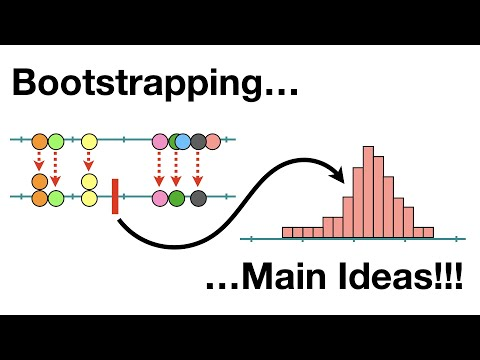

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

# Prelecture HW

## 1. 
### Both of these measure variability, but standard deviation refers to variability in the mean and the spread of individual data points, whereas "standard error of the mean" refers to how much the sample mean is expected to vary if you took multiple samples from the population (it reflects the accuracy of your data sample).

# 2. 
### The first step in using the standard error of the mean (SEM) to create a 95% confidence interval is to: calculate the SEM, then multiply the SEM by 1.96 (a special SEM multiplier value that is used for standard normal distribution), then you construct the confidence interval (by taking your sample mean and adding/subtracting the number). The resulting range likely contains the true average. Therfore, if you repeated the sampling many times, 95% of the sample means would fall within this range.

# 3. 
### To create a 95% bootstrapped confidence interval (without using SD to estimate SEM), you would: first generate bootstrapped means, then sort and arrange the bootstrapped means from lowest to highest, then determine the 95% confidence interval by cutting off the top and lowest 2.5% leaving you with the middle 95%. The last step is done by locating the 2.5th percentile and the 97.5th percentile.

# 4. 

In [5]:
#what it looks like for the mean parameter:
import numpy as np

# Step 1: Create a made-up sample
np.random.seed(42)  # For reproducibility
sample = np.random.normal(loc=50, scale=10, size=100)  # Sample of 100 with mean 50, std 10

# Step 2: Bootstrap function
def bootstrap_means(data, num_bootstrap=1000):
    boot_means = []
    for _ in range(num_bootstrap):
        boot_sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(boot_sample))
    return np.array(boot_means)

# Step 3: Generate bootstrap means
boot_means = bootstrap_means(sample, num_bootstrap=1000)

# Step 4: Calculate 95% confidence interval
lower_bound = np.percentile(boot_means, 2.5)
upper_bound = np.percentile(boot_means, 97.5)

# Step 5: Output the results
print(f"95% Bootstrap Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")


95% Bootstrap Confidence Interval: [47.28, 50.63]


In [3]:
#for the median
import numpy as np

# Step 1: Create a made-up sample
np.random.seed(42)  # For reproducibility
sample = np.random.normal(loc=50, scale=10, size=100)  # Sample of 100 with mean 50, std 10

# Step 2: Bootstrap function for median
def bootstrap_medians(data, num_bootstrap=1000): #here it changes the function name as it bootstraps the medians instead of the means
    boot_medians = []   # variable definition here changes
    for _ in range(num_bootstrap):
        boot_sample = np.random.choice(data, size=len(data), replace=True)
        boot_medians.append(np.median(boot_sample))   # this changes to calculate the median instead of the mean of the bootstrap sample
    return np.array(boot_medians)    #this changes so it can return the list of bootstrap medians

# Step 3: Generate bootstrap medians
boot_medians = bootstrap_medians(sample, num_bootstrap=1000)

# Step 4: Calculate 95% confidence interval for the median
lower_bound = np.percentile(boot_medians, 2.5)
upper_bound = np.percentile(boot_medians, 97.5)

# Step 5: Output the results
print(f"95% Bootstrap Confidence Interval for the Median: [{lower_bound:.2f}, {upper_bound:.2f}]")

95% Bootstrap Confidence Interval for the Median: [46.95, 51.34]


## Chat log for q1-4: https://chatgpt.com/share/66ff0b58-c9e8-8003-b64f-5887bd875739

#### Chat summary:
#### In our conversation, we covered the following topics:
#### Difference between Standard Error of the Mean (SEM) and Standard Deviation: We discussed that the standard deviation measures the variability of individual data points, while the SEM measures how much the sample mean is expected to vary. The SEM is derived from the standard deviation and decreases as sample size increases.
#### Creating a 95% Confidence Interval (CI) using SEM: We explained how to calculate a 95% CI by multiplying the SEM by 1.96 (a z-score corresponding to a 95% confidence level) and adding/subtracting it from the sample mean.
#### Bootstrapped Confidence Interval for the Mean: You asked how to create a 95% bootstrapped confidence interval without using the standard deviation. We covered how to:
##### Resample the data to generate a distribution of means.
##### Use the 2.5th and 97.5th percentiles of the bootstrapped means to create the confidence interval.
#### Python Code for Bootstrap CI for the Mean: I provided a Python code that generates a 95% bootstrap confidence interval for the population mean using resampling techniques.
#### Modifying the Code for Median: You asked how to adjust the code to create a confidence interval for the median. I showed how to modify the code to calculate the median for each bootstrap sample and explained what each line of the code does.

# Post-Lecture HW
# 5. 
#### A population parameter is the true value we aim to estimate, like the true mean or proportion of a population. However this can be impossible because of how big the population may be. On the other hand, the sample statistic (an actual concrete value) is the calculated value based on a specific sample of data. Then, confidence intervals use the sample statistic to estimate the range where the population parameter likely lies, and also accounts for sampling variability. The sample statistic is used to construct confidence intervals to make assumptions about the population parameter. 

# 6. 
## Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics

#### 6.1: Bootstrapping is a resampling procedure that uses data from a given sample to estimate the distribution (like mean, median, etc) by sampling with replacement from the original data. It is done by randomly reselecting values of the original sample and calculating the desired distribution, like the mean. This process can be repeated any number of desired times until you have enough means to create a histogram.
#### 6.2: Bootstrapping is typically used in situations where the original sample size is quite small relative to the total population or when the theoretical distribution of the statistic is complex/unknown. 
#### 6.3: To use bootstrapping to see whether or not your guess might be plausible you could go through a few steps. First you would calculate the mean of your sample population, then resample with replacement and compute the bootstrap means. Afterwards, you would construct a confidence interval by finding the appropriate percentiles. Lastly, you assess whether or not your hypothesis falls under this confidence interval. If it does, the hypothesized mean is plausible and if it doesn't, this suggests that the hypothesized mean may not be a plausible estimate of the population mean.

# 7.
### Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? 
#### If a confidence interval overlaps zero, that means that zero is still a possibility for the true mean. This means that we still can't be sure there’s a real effect or difference. Even if a sample's average is not zero, if zero is in that range (of the confidence interval), it means there is not strong enough evidence to say that the true mean definitely isn’t zero. Therefore, we must "fail to reject" the idea that there might be no effect or difference.
### Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.
#### To reject the null hypothesis, the confidence interval should not include zero. This would mean that zero is not a plausible value for the population average based on the sample data.

## Chat log: https://chatgpt.com/share/66ff5411-6220-8003-a43d-02d127cce03d

### Chat summary:

#### In this chat, we discussed the importance of distinguishing between population parameters and sample statistics when interpreting confidence intervals, as the former is the true value we aim to estimate, and the latter is based on sample data. You also asked about using bootstrapping to assess the plausibility of a hypothesized population mean, which involves resampling to create a distribution and constructing a confidence interval. We then talked about how a confidence interval overlapping zero means we "fail to reject the null hypothesis," as zero is a plausible value for the population mean. Conversely, if zero is not in the confidence interval, it suggests there’s enough evidence to "reject the null hypothesis," indicating a likely effect or difference.

# 8. ASSIGNMENT



In [4]:
import pandas as pd

In [5]:
df= pd.read_csv('./STA130HW4.csv')

In [6]:
df

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84
5,6,41,F,80,86
6,7,33,M,79,86
7,8,48,F,85,82
8,9,26,M,76,83
9,10,39,F,83,84


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

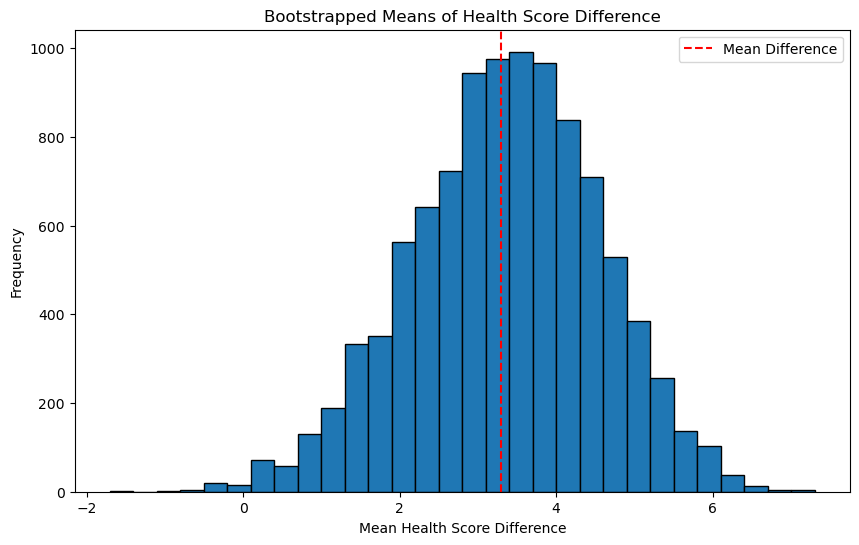

In [10]:
# Calculate the difference in health scores
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrap the mean difference
bootstrap_means = []
n_bootstraps = 10000

for _ in range(n_bootstraps):
    sample = df['HealthScoreDifference'].sample(frac=1, replace=True)
    bootstrap_means.append(sample.mean())

# Plot histogram of bootstrap means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, edgecolor='black')
plt.title('Bootstrapped Means of Health Score Difference')
plt.xlabel('Mean Health Score Difference')
plt.ylabel('Frequency')
plt.axvline(np.mean(bootstrap_means), color='red', linestyle='--', label='Mean Difference')
plt.legend()
plt.show()

In [21]:
df.describe()

,PatientID,Age,InitialHealthScore,FinalHealthScore,HealthScoreDifference
count,10.00000,10.00000,10.000000,10.000000,10.000000
mean,5.50000,38.40000,81.000000,84.300000,3.300000
std,3.02765,8.30261,2.828427,2.110819,4.029061
min,1.00000,26.00000,76.000000,80.000000,-3.000000
25%,3.25000,33.25000,79.250000,83.250000,1.250000
50%,5.50000,38.00000,81.000000,85.000000,4.000000
75%,7.75000,44.00000,83.000000,86.000000,6.750000
max,10.00000,52.00000,85.000000,86.000000,8.000000


#### The goal is to determine if there is a significant improvement in health scores. After bootstrapping, we can calculate the mean difference in health scores and assess the distribution of this difference. Furthermore, we can calculate a 95% confidence interval for the mean difference:

In [15]:
# Calculate 95% confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print(f"95% Confidence Interval: [{lower_bound}, {upper_bound}]")
print(f"Mean Difference: {np.mean(bootstrap_means)}")

95% Confidence Interval: [0.9, 5.5]
Mean Difference: 3.2991300000000003


#### As mentioned previously in question 6, the reason for bootstrapping is because we have a relatively small sample population. Here, bootsrapping was done by first calculating the difference of the patients' health scores before and after the vaccine. Then mean was calculated with these values and followed a resampling procedure by sampling with replacement and putting these new means into a histogram. 

#### We definitely can reject the null hypothesis. The confidence interval boundaries are 0.9 to 5.5, thus not including zero. This means that there is certainly an effect on the patients.

## Chat log: https://chatgpt.com/share/66ff66c8-b040-8003-8997-5d8542bd0f30

#### Here’s a summary of our discussion:
#### Data and Task: You provided a dataset of patient health scores before and after receiving a vaccine from AliTech. Your task was to evaluate whether the vaccine was effective in improving health scores using bootstrapping and visual representation.
#### Data Visualization: I generated a Python code to create a histogram of bootstrapped sample means for the health score improvements. This histogram helps visualize the distribution and potential effects of the vaccine on patients' health.
#### Quantitative Analysis and Bootstrapping: I explained how to calculate the mean and standard deviation of the health score improvement, construct a 95% confidence interval through bootstrapping, and interpret the results. Bootstrapping was recommended for its robustness and suitability for small sample sizes.
#### Hypothesis Testing: I outlined how to conclude regarding the null hypothesis of "no effect." By checking if zero lies within the 95% confidence interval, you can determine whether to reject the null hypothesis. If zero is outside the interval, the null hypothesis can be rejected, suggesting the vaccine is effective.
#### Concluding Statement: I summarized how to frame your conclusion based on whether the confidence interval includes zero, which directly informs whether the vaccine is likely effective in improving health scores.
#### This approach gives you a statistical basis for determining the effectiveness of the vaccine. Let me know if you need any more clarification or additional details!